In [1]:
from sklearn.grid_search import GridSearchCV #Define a grid of parameterse that will be searched using K-fold cross-validation

In [3]:
k_range = range(1, 31)
param_grid = dict(n_neighbors=k_range) #Map parameter names to list of values that should be searched
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
x = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, x, y, cv=10, scoring='accuracy')
grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy") #Setup the same, just w/o x and y
                                                                #Can set n_jobs=-1 to compute in parallel

In [5]:
grid.fit(x, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [8]:
grid.grid_scores_ #This is a named tuple

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [7]:
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [9]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

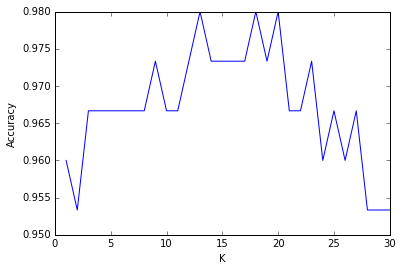

In [10]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")

In [11]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


## Searching multiple parameters simultaneously

* Example: tuning max_depth and min_asmples_leaf for a DecisionTreeClassifier
* Could tune parameters independently
* But best performance might be achieved when neither parameter is at its default value
* Need to search both simultaneously

In [12]:
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options) #Exhausts all possible combinations of these parameters
grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid.fit(x, y)
print grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'}, mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'}, mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'}, mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neig

In [13]:
print grid.best_score_
print grid.best_params_ #Didn't change from perform

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


# Using the best parameters to make predictions

In [15]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
# Once you know the best parameters to use, you want to use the entire dataset to train, not just a part
knn.fit(x, y)

knn.predict([[3, 5, 4, 2]])

array([1])

# Reducing computational expense using `RandomizedSearechCV`
* Searching many different parameters at once is computationally infeasible
* `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"

In [19]:
from sklearn.grid_search import RandomizedSearchCV

param_dist = dict(n_neighbors=k_range, weights=weight_options)
# Specify parameter distributions, not parameter grid
# For discrete values, where you pass a list of integers or strings
# It ends up being the same

In [20]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [21]:
rand.fit(x, y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 18, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 24, 'weights': 'distance'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 20, 'weights': 'distance'}]

In [24]:
print rand.best_score_
print rand.best_params_ #Still gets something close to the best result, while being much faster_

0.98
{'n_neighbors': 20, 'weights': 'uniform'}
